 # Stroke Rehab Analysis

In [1]:
# 1. Configure plotting & imports
%matplotlib inline
import numpy as np
import mne
from scipy.io import loadmat
from matplotlib import pyplot as plt

# Ensure every new plot starts fresh
plt.close('all')


In [2]:
# 2. Load .mat and inspect
data = loadmat('/Dev/stroke-rehab-data-analysis/data/stroke-rehab/P1_post_test.mat')
print("Keys:", data.keys())

# extract
fs       = float(data['fs'].squeeze())
triggers = data['trig'].ravel()
raw_data = data['y'].T


Keys: dict_keys(['__header__', '__version__', '__globals__', 'fs', 'trig', 'y'])


In [3]:
channels = ['FC3','FCz','FC4','C5','C3','C1','Cz','C2','C4','C6',
            'CP3','CP1','CPz','CP2','CP4','Pz']
info = mne.create_info(ch_names=channels, sfreq=fs, ch_types=['eeg']*len(channels))
info.set_montage('standard_1020')      # optional, for topomaps

raw = mne.io.RawArray(raw_data, info)


Creating RawArray with float64 data, n_channels=16, n_times=194088
    Range : 0 ... 194087 =      0.000 ...   758.152 secs
Ready.


In [4]:
# clear old figures
plt.close('all')

# find onsets/durations from triggers
p = np.r_[0, triggers, 0]
d = np.diff(p)
idx = np.where(d != 0)[0]
onsets, offsets = idx[::2], idx[1::2]
vals = triggers[onsets]
times = onsets / fs
dur   = (offsets - onsets) / fs
desc  = ['left' if v==1 else 'right' for v in vals]

annots = mne.Annotations(onset=times, duration=dur, description=desc)
raw.set_annotations(annots)


<RawArray | 16 x 194088 (758.2 s), ~23.7 MiB, data loaded>

In [5]:
plt.close('all')

events, event_id = mne.events_from_annotations(raw,
                                               event_id={'left':1,'right':2})
# shift to cue at +2s
events[:, 0] += int(2 * fs)

epochs = mne.Epochs(raw, events, event_id=event_id,
                    tmin=-0.2, tmax=1.0,
                    baseline=(None, 0),
                    preload=True)


Used Annotations descriptions: [np.str_('left'), np.str_('right')]
Not setting metadata
80 matching events found
Setting baseline interval to [-0.19921875, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 80 events and 308 original time points ...
0 bad epochs dropped


In [6]:
plt.close('all')
raw.plot(n_channels=4, scalings=1e2, block=True)


Using qt as 2D backend.


MESA: error: ZINK: failed to choose pdev
glx: failed to create drisw screen


Channels marked as bad:
none


In [23]:
raw.get_data().shape

(16, 194088)

In [27]:
def add_arrows(axes):
    """Add some arrows at 60 Hz and its harmonics."""
    for ax in axes:
        freqs = ax.lines[-1].get_xdata()
        psds = ax.lines[-1].get_ydata()
        for freq in (60, 120, 180, 240):
            idx = np.searchsorted(freqs, freq)
            # get ymax of a small region around the freq. of interest
            y = psds[(idx - 4) : (idx + 5)].max()
            ax.arrow(
                x=freqs[idx],
                y=y + 18,
                dx=0,
                dy=-12,
                color="red",
                width=0.1,
                head_width=3,
                length_includes_head=True,
            )

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/home/vcali/miniforge3/envs/sleep_stage_classification_env/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


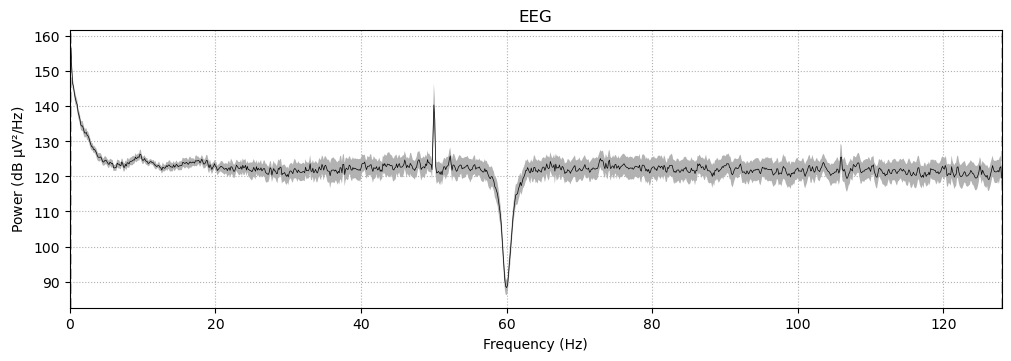

In [7]:
plt.close('all')
spectrum = raw.compute_psd()
fig = spectrum.plot(average=True, amplitude=False)
plt.show(fig)


Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/home/vcali/miniforge3/envs/sleep_stage_classification_env/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


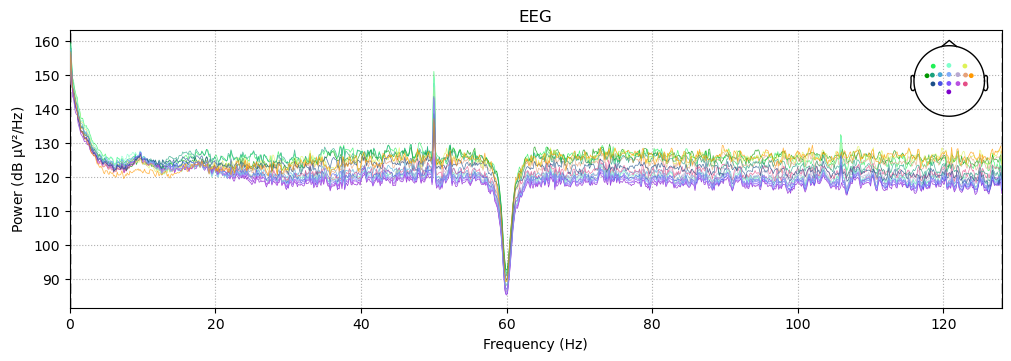

In [8]:
plt.close('all')
fig = raw.compute_psd().plot(dB=True)
plt.show(fig)

In [9]:
plt.close('all')
fig = epochs.plot(n_epochs=15, scalings='auto', block=True)
plt.show(fig)

Dropped 0 epochs: 
The following epochs were marked as bad and are dropped:
[]
Channels marked as bad:
none


    Using multitaper spectrum estimation with 7 DPSS windows
Averaging across epochs before plotting...


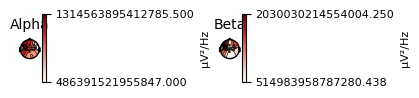

In [10]:
plt.close('all')
bands = {'Alpha':(8,12), 'Beta':(12,30)}
fig = epochs.compute_psd().plot_topomap(bands=bands)
plt.show(fig)


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


/tmp/ipykernel_339908/1841399290.py:2: RuntimeWarning: Only one channel in group "C3"; cannot combine by method "mean".
  epochs.plot_image(picks='C3', combine='mean', sigma=1.0)
/tmp/ipykernel_339908/1841399290.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks='C3', combine='mean', sigma=1.0)


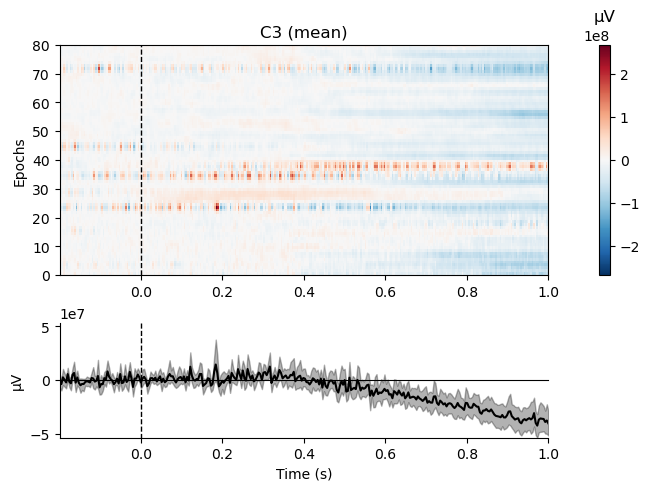

[<Figure size 640x480 with 3 Axes>]

In [11]:
plt.close('all')
epochs.plot_image(picks='C3', combine='mean', sigma=1.0)


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


/tmp/ipykernel_339908/877460544.py:2: RuntimeWarning: Only one channel in group "Cz"; cannot combine by method "mean".
  epochs.plot_image(picks='Cz', combine='mean', sigma=1.0)
/tmp/ipykernel_339908/877460544.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks='Cz', combine='mean', sigma=1.0)


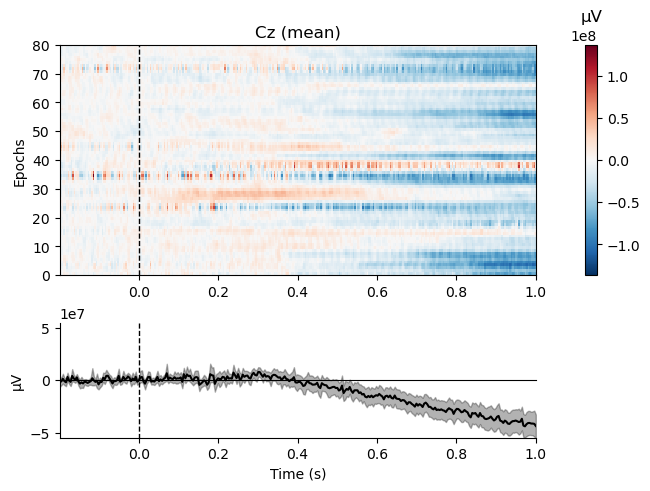

[<Figure size 640x480 with 3 Axes>]

In [12]:
plt.close('all')
epochs.plot_image(picks='Cz', combine='mean', sigma=1.0)


Not setting metadata
80 matching events found
No baseline correction applied
0 projection items activated
combining channels using "mean"


/tmp/ipykernel_339908/2656869526.py:2: RuntimeWarning: Only one channel in group "C4"; cannot combine by method "mean".
  epochs.plot_image(picks='C4', combine='mean', sigma=1.0)
/tmp/ipykernel_339908/2656869526.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  epochs.plot_image(picks='C4', combine='mean', sigma=1.0)


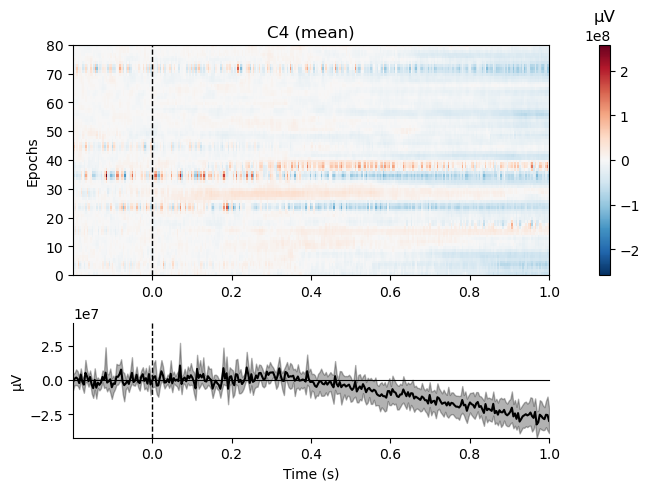

[<Figure size 640x480 with 3 Axes>]

In [13]:
plt.close('all')
epochs.plot_image(picks='C4', combine='mean', sigma=1.0)


# Filter data

In [33]:

raw_1_40 = raw.copy().filter(l_freq=1, h_freq=40.)
raw_0_7 = raw.copy().filter(l_freq=0.5, h_freq=7.)


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 s)



Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 7 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 7.00 Hz
- Upper transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 8.00 Hz)
- Filter length: 1691 samples (6.605 s)



Effective window size : 8.000 (s)


Plotting power spectral density (dB=True).


/home/vcali/miniforge3/envs/sleep_stage_classification_env/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


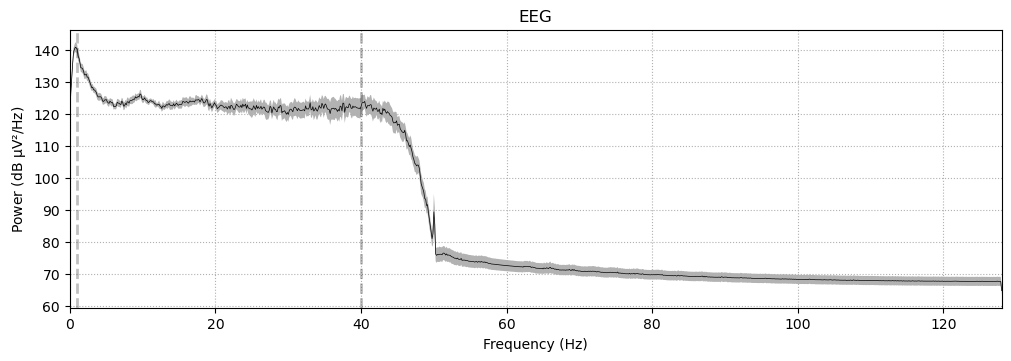

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/home/vcali/miniforge3/envs/sleep_stage_classification_env/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


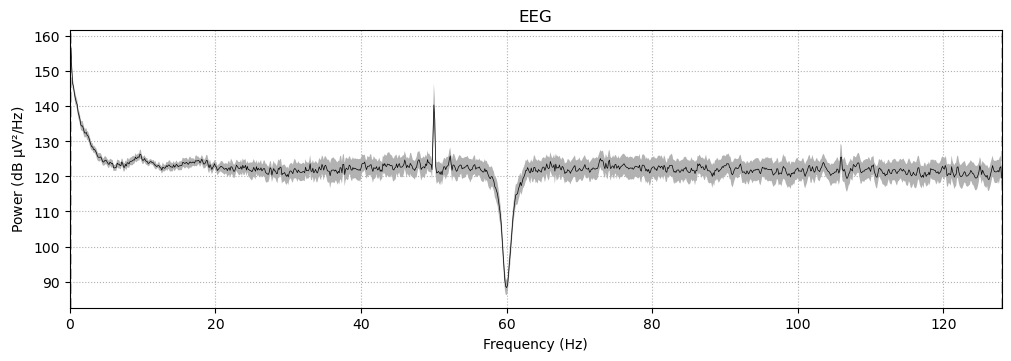

In [35]:
plt.close('all')
fig = raw_1_40.compute_psd().plot(average=True, picks="data", exclude="bads", amplitude=False)
plt.show(fig)
plt.close('all')
fig = raw.compute_psd().plot(average=True, picks="data", exclude="bads", amplitude=False)
plt.show(fig)

Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).


/home/vcali/miniforge3/envs/sleep_stage_classification_env/lib/python3.10/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


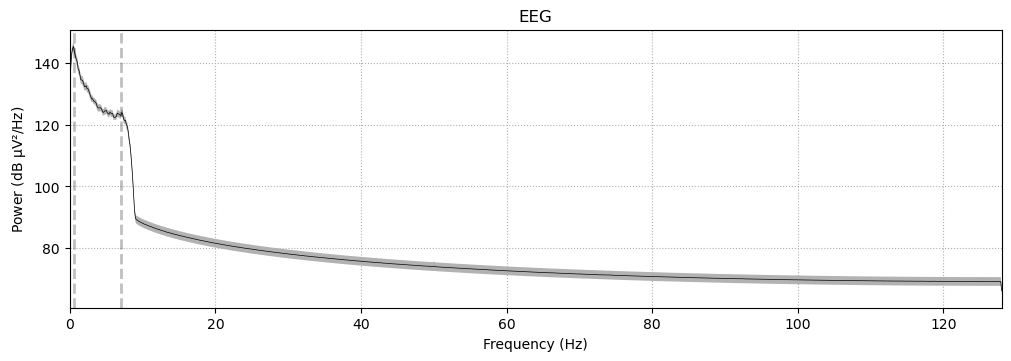

In [16]:
plt.close('all')
fig = raw_0_7.compute_psd().plot(average=True, picks="data", exclude="bads", amplitude=False)
plt.show(fig)